# 0. 문제 종류

한 아마추어 식물학자가 발견한 붓꽃의 품종을 알고 싶다고 가정한다. 이 식물학자는 붓꽃의 꽃잎과 꽃받침의 폭과 길이를 센티미터 단위로 측정했습니다.

또 전문 식물학자가 setosa, versicolor, virginica 종으로 분류한 붓꼬츠이 측정 데이터도 가지고 있습니다. 이 측정값을 이용해서 앞에서 채집한 붓꽃이 어떤 품종인지 구분하려고 한다. 우리의 목표는 어떤 품종인지 구분해놓은 측정 데이터를 이용해 새로 채집한 붓꽃의 품종을 예측하는 머시러닝 모델을 만드는 것이다.

붓꽃의 품종을 정확하게 분류한 데이터를 가지고 있으므로 이 문제는 지도 학습에 속한다. 이 경우에는 몇 가지 선택사항 중 하나를 선택하는 문제이다. 그러므로 이 예는 분류에 해당한다.

# 1. 데이터 적재

### 데이터를 불러오고 기본적인 정보를 살펴본다.

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
print("iris_dataset의 키: \n{}".format(iris_dataset.keys()))

iris_dataset의 키: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


- 데이터 셋 설명

In [3]:
print(iris_dataset['DESCR'][:193] + '\n...')

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [7]:
print('타깃 이름: {}'.format(iris_dataset['target_names']))
print("특성 이름: {}".format(iris_dataset['feature_names']))
print("data 타입: {}".format(type(iris_dataset['data'])))

타깃 이름: ['setosa' 'versicolor' 'virginica']
특성 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data 타입: <class 'numpy.ndarray'>


In [8]:
print("데이터 크기: {}".format(iris_dataset['data'].shape))

데이터 크기: (150, 4)


In [9]:
print("data의 처음 다섯 행: \n{}".format(iris_dataset['data'][:5]))

data의 처음 다섯 행: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [10]:
print("target의 타입: {}".format(type(iris_dataset['target'])))

target의 타입: <class 'numpy.ndarray'>


In [11]:
print("target의 크기: {}".format(iris_dataset['target'].shape))

target의 크기: (150,)


In [12]:
print("target: {}".format(iris_dataset['target']))

target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 2. 훈련 데이터와 테스트 데이터

### 훈련 데이터와 테스트 데이터로 나눈다. 테스트 데이터는 보지 않아야 한다.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [14]:
print("X_train 크기: {}".format(X_train.shape))
print("y_train 크기: {}".format(y_train.shape))

X_train 크기: (112, 4)
y_train 크기: (112,)


In [15]:
print("X_test 크기: {}".format(X_test.shape))
print("y_test 크기: {}".format(y_test.shape))

X_test 크기: (38, 4)
y_test 크기: (38,)


# 3. 데이터 탐색

In [26]:
import numpy as np
import pandas as pd
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15758b00>,
      dtype=object)

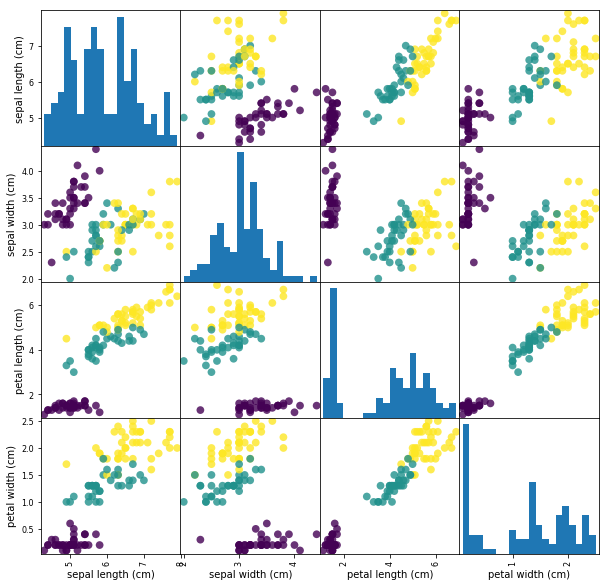

In [23]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe,
                           c=y_train,
                           figsize=(10, 10),
                           marker='o',
                           hist_kwds={'bins': 20},
                           s=60, 
                           alpha=0.8
                          )

- 파란색: setosa
- 붉은색: versicolor
- 녹색: virginica

- 세 클래스가 꽃잎과 꽃받침의 측정값에 따라 비교적 잘 구분된다.

# 4. 머신러닝 알고리즘 적용

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# 5. 예측하기

- 꽃받침 길이: 5cm, 폭이 2.9cm, 꽃잎 길이: 1cm, 폭이 0.2cm

In [27]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X new shape: {}".format(X_new.shape))

X new shape: (1, 4)


In [28]:
prediction = knn.predict(X_new)
print("에측: {}".format(prediction))
print("예측한 타깃 이름: {}".format(iris_dataset['target_names'][prediction]))

에측: [0]
예측한 타깃 이름: ['setosa']


# 6. 모델 평가하기

In [29]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값: \n{}".format(y_pred))

테스트 세트에 대한 예측값: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [30]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.97


In [32]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97
